In [239]:
from itertools import cycle
from math import hypot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.cluster import DBSCAN as skDBSCAN

# Datasets
![Atom](data/Atom.png)
![Chainlink](data/Chainlink.png)
![EngyTime](data/EngyTime.png)
![GolfBall](data/GolfBall.png)
![Hepta](data/Hepta.png)
![Lsun](data/Lsun.png)
![Target](data/Target.png)
![Tetra](data/Tetra.png)
![TwoDiamonds](data/TwoDiamonds.png)
![WingNut](data/WingNut.png)

In [184]:
datasets = ['Atom', 'Chainlink', 'EngyTime', 'GolfBall', 'Hepta', 'Lsun', 'Target', 'Tetra', 'TwoDiamonds', 'WingNut']

In [200]:
def open_dataset(dataset):
    lrn = pd.read_csv('data/' + dataset + '.lrn', sep='\t', skiprows=4, header=None) \
        .drop([0], axis=1) \
        .values
    cls = pd.read_csv('data/' + dataset + '.cls', sep='\t', skiprows=1, header=None)[1] \
        .values \
        .flatten()
    return lrn, cls

# DBSCAN

In [406]:
class DBSCAN(BaseEstimator, ClusterMixin):

    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
    
    def skfit(self, X, y=None):
        delegate = skDBSCAN(eps=self.eps, min_samples=self.min_samples)
        
        self.labels_ = delegate.fit(X).labels_
        self.X_ = X
        self.y_ = y
        
        return self
    
    def fit(self, P, y=None):
        NOISE = 0
        C = 0
        N = P.shape[0]
        
        visited = np.zeros(N, dtype=bool)
        clustered = np.zeros(N, dtype=bool)
        labels = np.zeros(N, dtype=int)
        
        def region_query(i):
            return [j for j in np.arange(N) if np.linalg.norm(P[i] - P[j]) < self.eps]
        
        def expand_cluster(i, neighbours):
            p = P[i]
            labels[i] = C
            clustered[i] = True
            while neighbours:
                j = neighbours.pop()
                q = P[j]
                if not visited[j]:
                    visited[j] = True
                    neighbour_neighbours = region_query(j)
                    if len(neighbour_neighbours) > self.min_samples:
                        neighbours.extend(neighbour_neighbours)
                #if not clustered[j]:
                clustered[j] = True
                labels[j] = C

        for i in np.arange(N):
            p = P[i]
            if visited[i]:
                continue
            visited[i] = True
            neighbours = region_query(i)
            if len(neighbours) < self.min_samples:
                labels[i] = NOISE
            else:
                C += 1
                expand_cluster(i, neighbours)

        self.labels_ = labels
        
        return self

In [412]:
def plot3D(X, labels):    
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    for k, col in zip(set(labels), cycle('grbcmyk')):
        if k == 0:
            col = [0, 0, 0, 1]

        xyz = X[labels == k]
        ax.plot(xyz[:, 0], xyz[:, 1], xyz[:, 2], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

    plt.show()

In [408]:
(lrn1, cls1) = open_dataset(datasets[0])

In [409]:
lrn1.shape, cls1.shape

((800, 3), (800,))

In [410]:
clustrer = DBSCAN(eps=20, min_samples=10)
clustering = clustrer.fit(lrn1)
labels = clustering.labels_

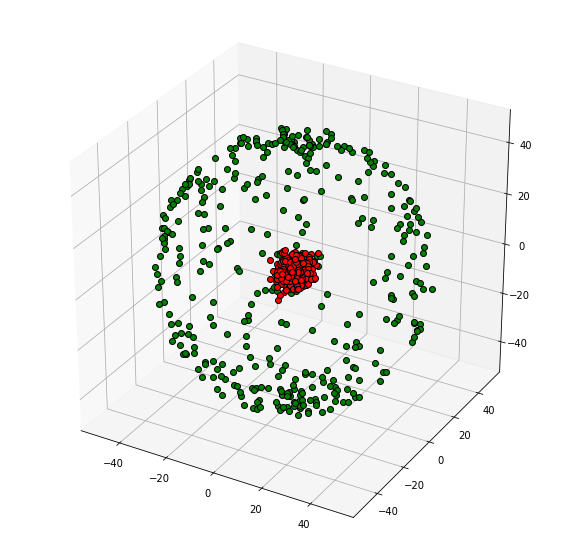

In [413]:
plot3D(lrn1, labels)